<a href="https://colab.research.google.com/github/yrahul3910/fastai-course/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
n = 100

In [7]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1, 1)  # The trailing underscore means *replace*, not *return* the uniform random numbers.
x[:5]

tensor([[-0.4470,  1.0000],
        [ 0.4204,  1.0000],
        [-0.2557,  1.0000],
        [ 0.4107,  1.0000],
        [-0.6422,  1.0000]])

In [0]:
a = torch.tensor((3., 2))
y = x @ a + torch.rand(n)

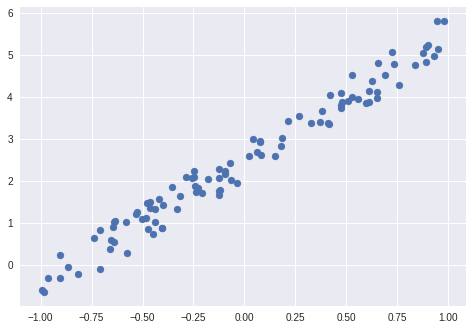

In [14]:
plt.scatter(x[:, 0], y);

In [0]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

In [0]:
w = torch.tensor([1., 1])  # Some initial guess

In [0]:
y_hat = x @ w

In [18]:
mse(y_hat, y)

tensor(3.3409)

In [20]:
w.type()

'torch.FloatTensor'

## Gradient Descent

In [0]:
w = torch.nn.Parameter(w)

In [0]:
def step():
    y_hat = x @ w
    loss = mse(y_hat, y)
  
    if t % 10 == 0:
        print(loss)
  
    loss.backward()
    with torch.no_grad():
        w.sub_(lr * w.grad)
        w.grad.zero_()

In [24]:
lr = 0.1
for t in range(100):
    step()

tensor(0.4240, grad_fn=<MeanBackward1>)
tensor(0.1699, grad_fn=<MeanBackward1>)
tensor(0.1039, grad_fn=<MeanBackward1>)
tensor(0.0851, grad_fn=<MeanBackward1>)
tensor(0.0797, grad_fn=<MeanBackward1>)
tensor(0.0782, grad_fn=<MeanBackward1>)
tensor(0.0778, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)
tensor(0.0776, grad_fn=<MeanBackward1>)


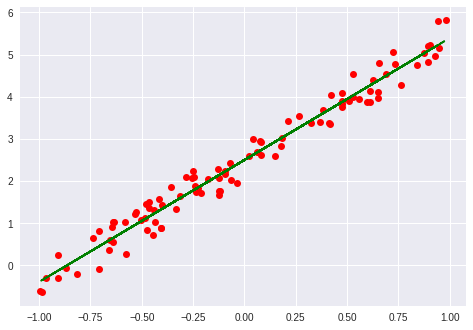

In [33]:
plt.plot(x[:, 0].detach().numpy(), y.detach().numpy(), 'ro',
         x[:, 0].detach().numpy(), (x@w).detach().numpy(), 'g--');

## Animate it!

In [0]:
from matplotlib import animation, rc

In [0]:
rc('animation', html='html5')

In [39]:
w = torch.nn.Parameter(torch.tensor([-1., 1]))
fig = plt.figure()
plt.scatter(x[:, 0].detach().numpy(), y.detach().numpy(), c='orange')
line, = plt.plot(x[:, 0].detach().numpy(), (x @ w).detach().numpy())
plt.close()

def animate(i):
    step()
    line.set_ydata((x @ w).detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)